# Name: Rania Mostafa Hassan
# ID: 211000884
# Section 1

# 1. Adding noise to an image

In [2]:
from skimage import data, io
from scipy import misc
import numpy as np
from matplotlib import pyplot as plt
from scipy.fftpack import fftshift, ifftshift, fft2, ifft2
import cv2

In [3]:
f=data.camera()
shape = f.shape[0], f.shape[1]
x, y = np.meshgrid(range(0, shape[0]), range(0, shape[1])) 
noise = np.zeros(shape, dtype='float64') 
s=1+np.sin(x+y/1.5) 
noisyImage = ((f)/128+s)/4

(-0.5, 511.5, 511.5, -0.5)

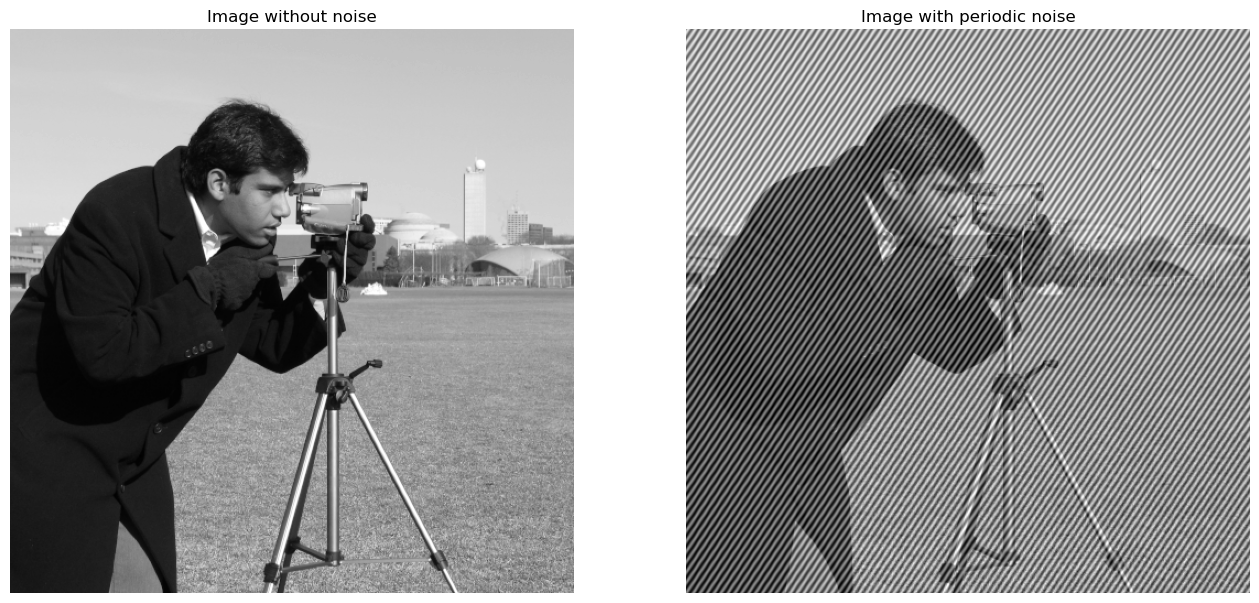

In [4]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(16, 8))
ax0.imshow(f,cmap='gray')
ax0.set_title("Image without noise")
ax0.axis('off')
ax1.imshow(noisyImage, cmap='gray')
ax1.set_title("Image with periodic noise")
ax1.axis('off')

# 2. Applying Notch Filter

In [5]:
spectrum = fft2(noisyImage) 
spectrum = fftshift(spectrum) 
freq_noisyImage=20*np.log(np.abs(spectrum)) 
noise_filter = np.ones(shape=(512,512)) 
noise_filter[175:205 , 160:185]=0 
noise_filter[290:320 , 160:185]=0
noise_filter[175:205 , 320:350]=0
noise_filter[290:320 , 320:350]=0
denoised_image = ifft2(fftshift(spectrum*noise_filter)) 
denoised_image_mag=np.abs(denoised_image) 
freq_denoised_mag=20*np.log(np.abs(spectrum))*noise_filter 

(-0.5, 511.5, 511.5, -0.5)

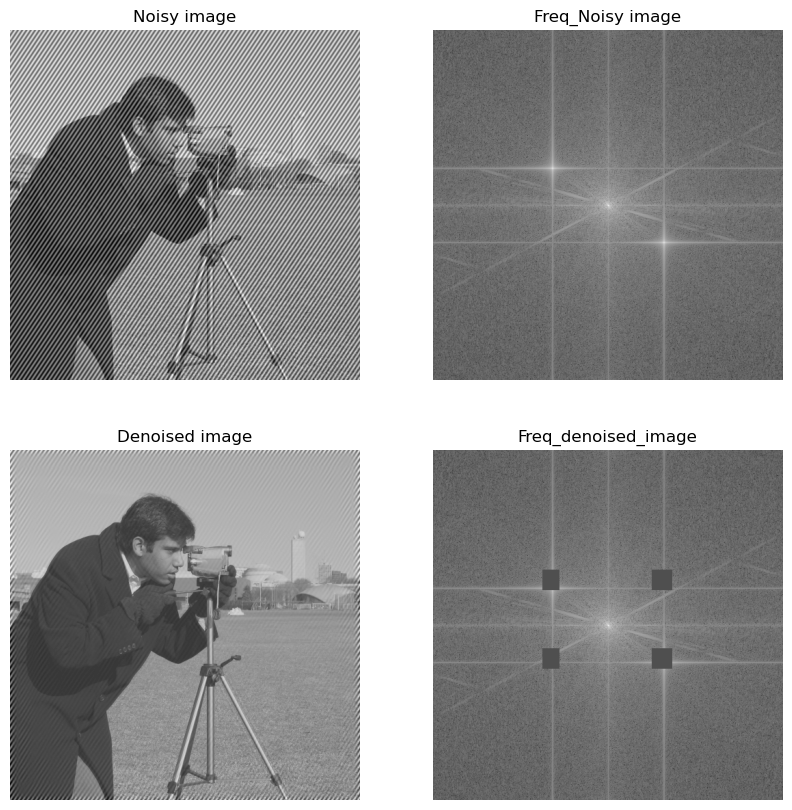

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax1, ax2, ax3, ax4 = ax.ravel()

ax1.imshow(noisyImage, cmap=plt.cm.gray)
ax1.set_title('Noisy image')
ax1.axis('off')

ax2.imshow(freq_noisyImage, cmap=plt.cm.gray)
ax2.set_title('Freq_Noisy image')
ax2.axis('off')

ax3.imshow(denoised_image_mag, cmap=plt.cm.gray)
ax3.set_title('Denoised image')
ax3.axis('off')

ax4.imshow(freq_denoised_mag, cmap=plt.cm.gray)
ax4.set_title('Freq_denoised_image')
ax4.axis('off')

C:\Users\Rania\AppData\Local\Temp\ipykernel_22376\3972085472.py:24: RuntimeWarning: divide by zero encountered in log
  axes[1, 1].imshow(np.log(np.abs(centered_shifted)), cmap='gray')


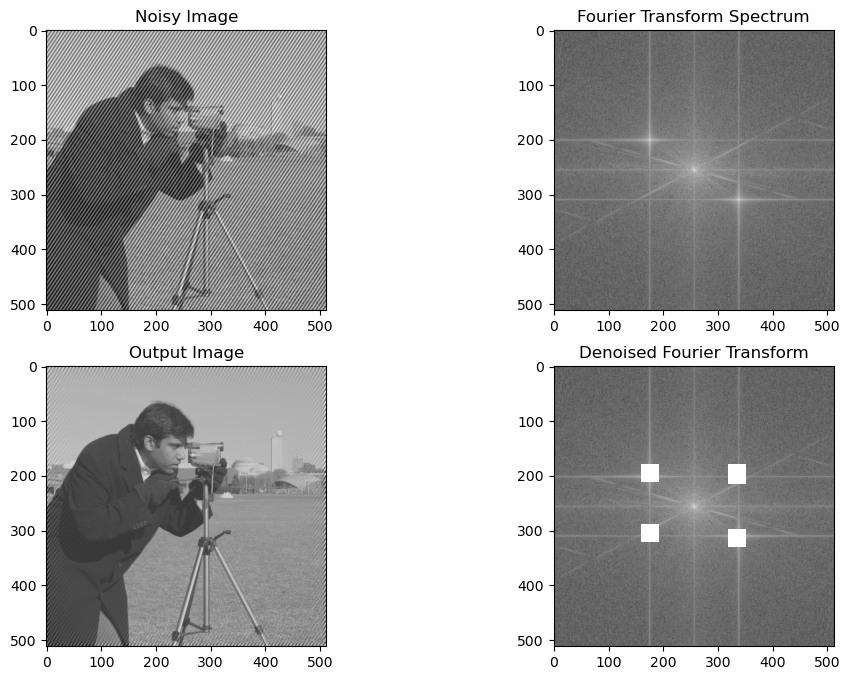

In [12]:
def remove_periodic_noise(noisyImage):
    
    fourier_transform = fft2(noisyImage)
    centered_shifted = fftshift(fourier_transform)
    centered_shifted[180:210 , 160:190]=0
    centered_shifted[290:320 , 160:190]=0
    centered_shifted[180:215 , 320:350]=0
    centered_shifted[300:330 , 320:350]=0

    
    inverse_shifted = ifftshift(centered_shifted)
    output_image = np.abs(ifft2(inverse_shifted))

    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    axes[0, 0].imshow(noisyImage, cmap='gray')
    axes[0, 0].set_title('Noisy Image')

    axes[0, 1].imshow(np.log(np.abs(fftshift(fourier_transform))), cmap='gray')
    axes[0, 1].set_title('Fourier Transform Spectrum')

    axes[1, 0].imshow(output_image, cmap='gray')
    axes[1, 0].set_title('Output Image')

    axes[1, 1].imshow(np.log(np.abs(centered_shifted)), cmap='gray')
    axes[1, 1].set_title('Denoised Fourier Transform')
    plt.show()

remove_periodic_noise(noisyImage)

# 3. Applying Band Reject Filter

In [65]:
def band_reject_filter(shape, center, inner_radius, outer_radius):
    distance = np.sqrt((x - center[0])**2 + (y - center[1])**2) 
    mask = np.logical_and(distance > inner_radius, distance < outer_radius) 
    return mask.astype(float)

center = (shape[0] // 2, shape[1] // 2) 
inner_radius = 90
outer_radius = 110
band_reject_filter = 1 - band_reject_filter(shape, center, inner_radius, outer_radius) 


denoised_spectrum = spectrum * band_reject_filter 
denoised_image = ifft2(fftshift(denoised_spectrum)) 
denoised_image_mag = np.abs(denoised_image)
freq_denoised_mag = 20 * np.log1p(np.abs(denoised_spectrum))

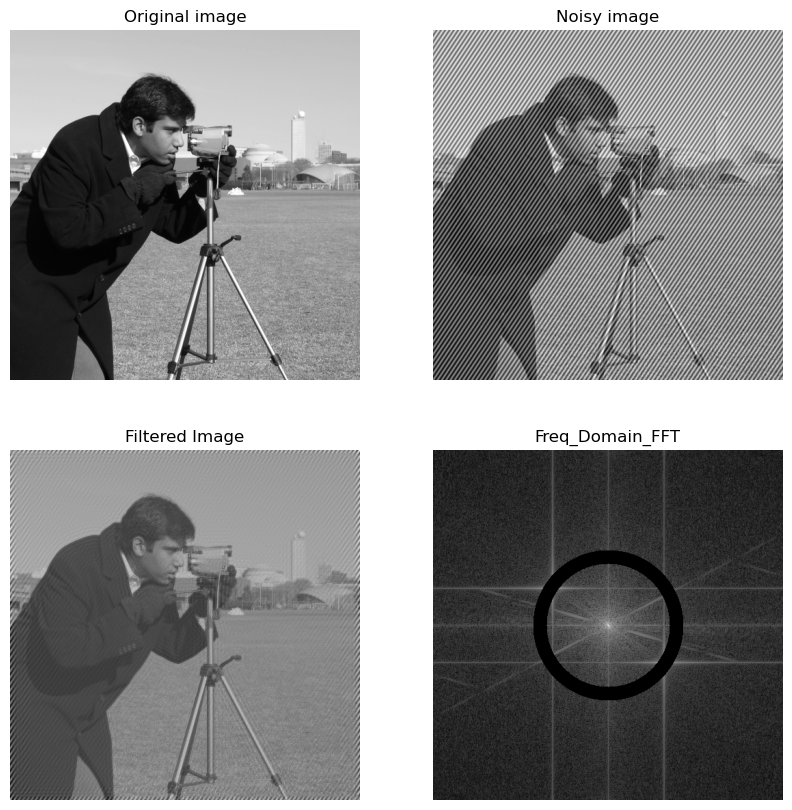

In [66]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax1, ax2, ax3, ax4 = ax.ravel()

ax1.imshow(f,  cmap='gray')
ax1.set_title('Original image')
ax1.axis('off')

ax2.imshow(noisyImage,  cmap='gray')
ax2.set_title('Noisy image')
ax2.axis('off')

ax3.imshow(denoised_image_mag,  cmap='gray')
ax3.set_title('Filtered Image')
ax3.axis('off')

ax4.imshow(freq_denoised_mag,  cmap='gray')
ax4.set_title('Freq_Domain_FFT')
ax4.axis('off')

plt.show()